# Simulation of Prices of Coupon-Bearing Bonds using CIR

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
erk.bond_price(5, 100, .05, 12, .03)

0    109.275393
dtype: float64

In [35]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)

In [36]:
erk.bond_price(5, 100, .05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [37]:
erk.bond_price(5, 100, .05, 12, rates.iloc[1][[1,2,3]])

1    107.882209
2    109.973481
3    108.970460
dtype: float64

In [38]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.032883,0.028571,0.030627
2,0.034003,0.030425,0.034116
3,0.032848,0.025945,0.034817
4,0.028482,0.028450,0.038893


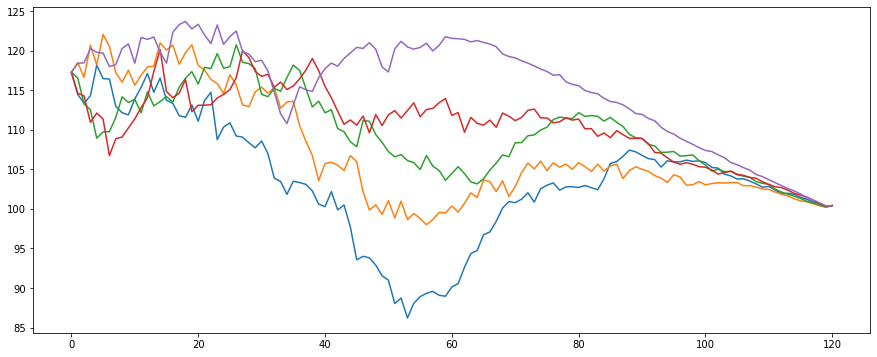

In [39]:
erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(15,6))

In [40]:
prices = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,114.468,118.487,116.55,114.617,118.384
2,113.355,116.618,113.254,114.275,118.462
3,114.293,120.703,112.537,110.945,120.243
4,118.164,118.194,108.937,112.104,119.79
...,...,...,...,...,...
116,101.212,100.891,100.957,101.481,101.422
117,100.88,100.64,100.75,101.106,101.106
118,100.594,100.395,100.503,100.721,100.75
119,100.286,100.192,100.249,100.353,100.374


In [42]:
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [43]:
p = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, 0.05, 12)
erk.annualize_rets(btr, 12)

1    0.033549
2    0.031732
3    0.030623
4    0.030166
dtype: float64

In [44]:
price_10 = erk.bond_price(10, 100, 0.05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,101.212,100.891,100.957
117,100.88,100.64,100.75
118,100.594,100.395,100.503
119,100.286,100.192,100.249
120,100.417,100.417,100.417


In [45]:
price_30 = erk.bond_price(30, 100, 0.05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,164.792,143.519,147.59
117,161.763,141.115,150.123
118,162.494,137.265,150.338
119,159.258,135.869,149.545
120,155.389,135.272,150.461


In [46]:
price_30[[1,2,3]].head()

,1,2,3
0,139.532,139.532,139.532
1,132.566,143.066,137.921
2,129.961,138.35,129.709
3,132.539,149.831,128.107
4,143.063,143.144,119.533


In [47]:
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_bonds = .6*rets_10 + .4*rets_30

In [48]:
mean_rets_bond = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bond))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035871,0.003644,-0.019351,2.491706,-0.001202,-0.000914,1.567807,0.0


In [49]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [50]:
rets_eq = pd.DataFrame(price_eq).pct_change().dropna()
rets_eq.shape

(120, 500)

In [51]:
rets_bonds.shape

(120, 500)

In [52]:
rets = .7*rets_eq + .3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.059446,0.005051,-0.274216,3.468867,-0.002339,-0.001487,5.673556,0.0
